In [1]:
%matplotlib inline

import sys
sys.path.append('..')
from LyaPlotter.computations import Computations
from LyaPlotter.plotter import Plotter
from LyaPlotter.sims import CoLoReSim, LyaCoLoReSim, QuickQuasarsSim
import glob
import matplotlib.pyplot as plt
import numpy as np

location_Lya = '/global/cscratch1/sd/cramirez/reproduce_london/LyaCoLoRe'
location_QQ = '/global/cscratch1/sd/cramirez/reproduce_london/QuickQuasars'

In [2]:
QuickQuasars_sims = []
for i,path in enumerate(QuickQuasarsSim.search(location_QQ)):
    QuickQuasars_sims.append( QuickQuasarsSim(i,path,compression=False))
    print(QuickQuasars_sims[i])

QuickQuasars sim. Id: 0	Name: quickquasars_example	Path: /global/cscratch1/sd/cramirez/reproduce_london/QuickQuasars/quickquasars_example
QuickQuasars sim. Id: 1	Name: my_example	Path: /global/cscratch1/sd/cramirez/reproduce_london/QuickQuasars/my_example
QuickQuasars sim. Id: 2	Name: lyacolore_example	Path: /global/cscratch1/sd/cramirez/reproduce_london/QuickQuasars/lyacolore_example
QuickQuasars sim. Id: 3	Name: full_example_2_nodes	Path: /global/cscratch1/sd/cramirez/reproduce_london/QuickQuasars/full_example_2_nodes
QuickQuasars sim. Id: 4	Name: full_example_1_node	Path: /global/cscratch1/sd/cramirez/reproduce_london/QuickQuasars/full_example_1_node
QuickQuasars sim. Id: 5	Name: lyacolore_sh_with_my_colore	Path: /global/cscratch1/sd/cramirez/reproduce_london/QuickQuasars/lyacolore_sh_with_my_colore
QuickQuasars sim. Id: 6	Name: no_transmission	Path: /global/cscratch1/sd/cramirez/reproduce_london/QuickQuasars/no_transmission
QuickQuasars sim. Id: 7	Name: noisy	Path: /global/cscratch

In [3]:
q = QuickQuasars_sims[3]
q1 = QuickQuasars_sims[8]
q2 = QuickQuasars_sims[6]
q3 = QuickQuasars_sims[7]
q4 = QuickQuasars_sims[9]
R = q.get_spectra(arm='R')
B= q.get_spectra(arm='b')
Z= q.get_spectra(arm='z')

The distribution is exactly the same for the three arms because it is extracted from the Truth/Best files:

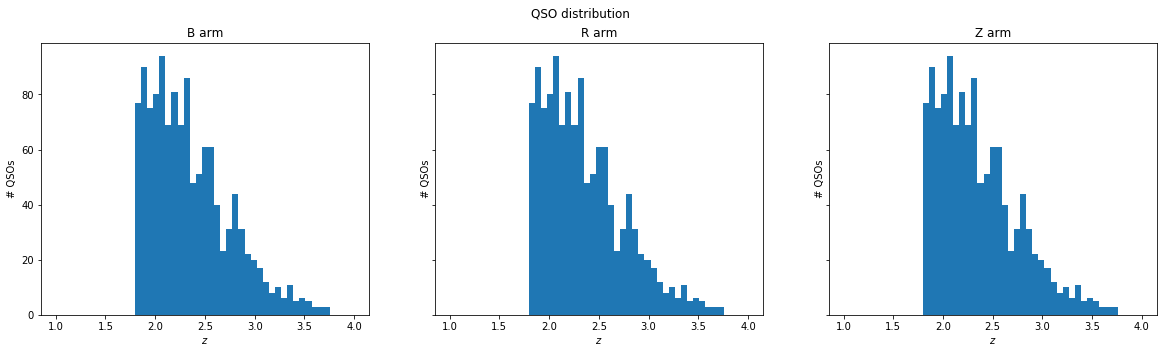

In [4]:
fig9, ax_array = plt.subplots(1,3, sharex=False, sharey=True, figsize=(20,5))
ax1, ax2, ax3 = ax_array
B.plot_dist(ax=ax1)
R.plot_dist(ax=ax2)
Z.plot_dist(ax=ax3)
ax1.set_title('B arm')
ax2.set_title('R arm')
ax3.set_title('Z arm')
plt.suptitle('QSO distribution')
plt.show()

/global/homes/c/cramirez/.local/cori/3.7-anaconda-2019.07/lib/python3.8/site-packages/numpy/lib/histograms.py:908: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges


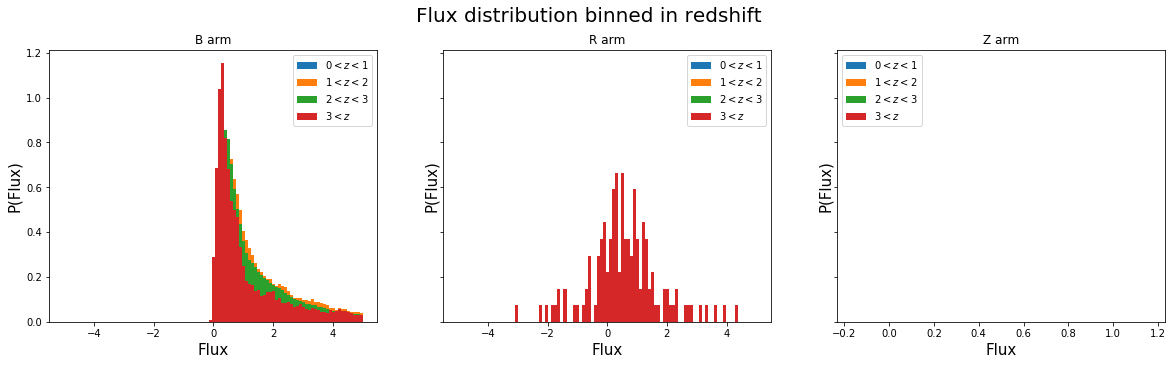

In [5]:
fig3, ax_array = plt.subplots(1,3, sharex=False, sharey=True, figsize=(20,5))
ax1, ax2, ax3 = ax_array
_1 = B.plot_pdf(B.flux, 'Flux', ax=ax1)
_2 = R.plot_pdf(R.flux, 'Flux', ax=ax2)
_3 = Z.plot_pdf(Z.flux, 'Flux', ax=ax3)
ax1.set_title('B arm')
ax2.set_title('R arm')
ax3.set_title('Z arm')
for ax in [ax1,ax2,ax3]:
    ax.set_xlabel('Flux', fontsize=15)
    ax.set_ylabel('P(Flux)', fontsize=15)
plt.suptitle('Flux distribution binned in redshift', fontsize=20, y=1)
plt.show()

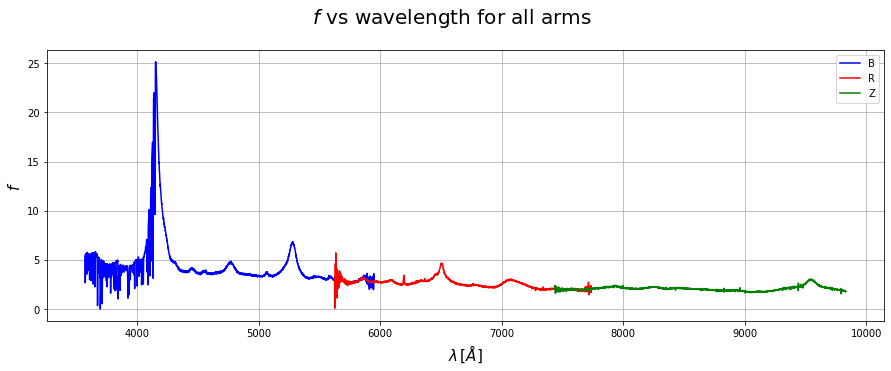

In [6]:
mockid=0
fig4, ax_array = plt.subplots(1,1, sharex=False, sharey=True, figsize=(15,5))
ax1 = ax_array
_1 = B.single_skewer(B.flux, B.wavelength, ax=ax1, mockid=mockid, c='b', label='B')
_2 = R.single_skewer(R.flux, R.wavelength, ax=ax1, mockid=mockid, c='r', label='R')
_3 = Z.single_skewer(Z.flux, Z.wavelength, ax=ax1, mockid=mockid, c='g', label='Z')
ax1.grid()
ax1.set_ylabel('$f$', fontsize=15)
ax1.set_xlabel('$ \lambda \, [\AA]$', fontsize=15)
plt.suptitle('$f$ vs wavelength for all arms', fontsize=20, y=1)
ax1.legend()
plt.show()

### Different configurations QuickQuasars

In [7]:
print(q1,"\n",q2,"\n",q3,"\n",q4)

QuickQuasars sim. Id: 8	Name: normal	Path: /global/cscratch1/sd/cramirez/reproduce_london/QuickQuasars/normal 
 QuickQuasars sim. Id: 6	Name: no_transmission	Path: /global/cscratch1/sd/cramirez/reproduce_london/QuickQuasars/no_transmission 
 QuickQuasars sim. Id: 7	Name: noisy	Path: /global/cscratch1/sd/cramirez/reproduce_london/QuickQuasars/noisy 
 QuickQuasars sim. Id: 9	Name: 5_exposures	Path: /global/cscratch1/sd/cramirez/reproduce_london/QuickQuasars/5_exposures


In [8]:
B1 = q1.get_spectra(arm='b')
B2 = q2.get_spectra(arm='b')
B3 = q3.get_spectra(arm='b')
B4 = q4.get_spectra(arm='b')

In [9]:
mockid = 44512

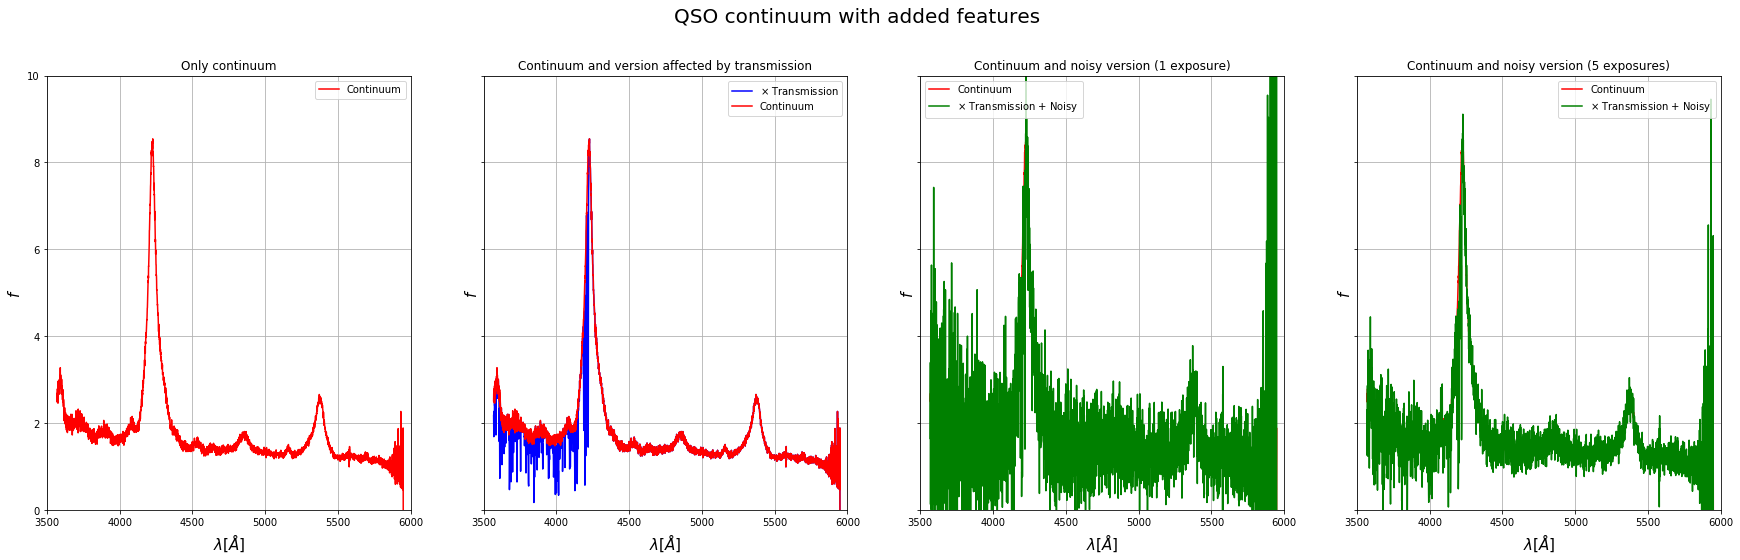

In [10]:
fig4, ax_array = plt.subplots(1,4, sharex=False, sharey=True, figsize=(30,8))
ax1, ax2, ax3,ax4 = ax_array

_1 = B1.single_skewer(B1.flux, B1.wavelength, ax=ax2, mockid=mockid, c='b', label='$\\times$ Transmission')
_2 = B2.single_skewer(B2.flux, B2.wavelength, ax=ax1, mockid=mockid, c='r', label='Continuum')
_2 = B2.single_skewer(B2.flux, B2.wavelength, ax=ax2, mockid=mockid, c='r', label='Continuum')
_2 = B2.single_skewer(B2.flux, B2.wavelength, ax=ax3, mockid=mockid, c='r', label='Continuum')
_3 = B3.single_skewer(B3.flux, B3.wavelength, ax=ax3, mockid=mockid, c='g', label='$\\times$ Transmission + Noisy')
_2 = B2.single_skewer(B2.flux, B2.wavelength, ax=ax4, mockid=mockid, c='r', label='Continuum')
_4 = B3.single_skewer(B4.flux, B4.wavelength, ax=ax4, mockid=mockid, c='g', label='$\\times$ Transmission + Noisy')

ax1.set_title('Only continuum')
ax2.set_title('Continuum and version affected by transmission')
ax3.set_title('Continuum and noisy version (1 exposure)')
ax4.set_title('Continuum and noisy version (5 exposures)')
for ax in ax_array:
    ax.grid()
    ax.set_xlim(3500,6000)
    ax.set_ylabel('$f$', fontsize=15)
    ax.set_xlabel('$ \lambda [\AA]$', fontsize=15)
    ax.set_ylim(0,10)
    ax.legend()
plt.suptitle('QSO continuum with added features', y=1, fontsize=20)
plt.show()

## LyaCoLoRe + QuickQuasars

In [12]:
LyaSim = LyaCoLoReSim(0,'/global/cscratch1/sd/cramirez/reproduce_london/LyaCoLoRe/transmission_only_false_20200504051746',name='LyaCoLoRe')

In [18]:
for item in (LyaSim,):
    item.a= item.picca_gaussian_colorecell = item.get_PiccaStyleFiles('picca-gaussian-colorecell')
    item.b= item.picca_gaussian            = item.get_PiccaStyleFiles('picca-gaussian')
    item.c= item.picca_density             = item.get_PiccaStyleFiles('picca-density')
    item.d= item.picca_tau_no_RSD          = item.get_PiccaStyleFiles('picca-tau-noRSD-notnorm')
    item.e= item.picca_tau_notnorm         = item.get_PiccaStyleFiles('picca-tau-notnorm')
    item.f= item.picca_flux_noRSD_notnorm  = item.get_PiccaStyleFiles('picca-flux-noRSD-notnorm')
    item.g= item.picca_flux_notnorm        = item.get_PiccaStyleFiles('picca-flux-notnorm')
    
colours = ['#F5793A','#A95AA1','#85C0F9','#0F2080']
for item in (LyaSim,):
    item.a.style = {'c': colours[0], 'ls': '--', 'label':'$\delta_C$'}
    item.b.style = {'c': colours[0], 'ls': '-', 'label':'$\delta_G$'}
    item.c.style = {'c': colours[1], 'ls': '-', 'label':'$1+\delta$'}
    item.d.style = {'c': colours[2], 'ls': ':', 'label':'$ \\tau_{noRSD}$'}
    item.e.style = {'c': colours[2], 'ls': '-', 'label':'$ \\tau $'}
    item.f.stlye = {'c': colours[3], 'ls': ':', 'label':'$ \\tau_{norsd}notnorm$'}
    item.g.style = {'c': colours[3], 'ls': '-', 'label':'$F$'}

In [19]:
mockid = 64467
mockid_quickquasars = 64467

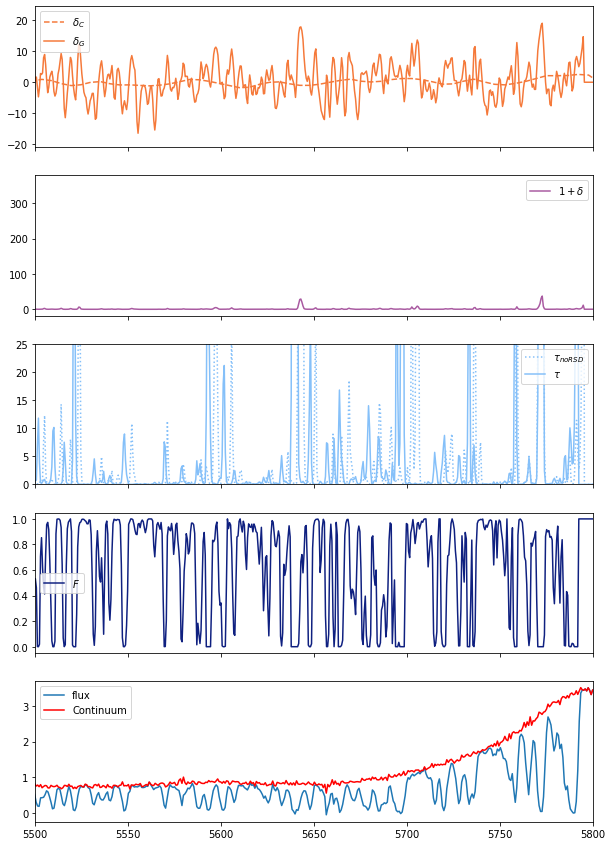

In [20]:
fig, ax_array = plt.subplots(5,1 , sharex=True, sharey=False, figsize=(10,15))
ax1, ax2, ax3,ax4, ax5 = ax_array
LyaSim.a.single_skewer(LyaSim.a.values, LyaSim.a.wavelength, ax=ax1, mockid = mockid, **LyaSim.a.style)
LyaSim.b.single_skewer(LyaSim.b.values, LyaSim.b.wavelength, ax=ax1, mockid = mockid, **LyaSim.b.style)
LyaSim.c.single_skewer(LyaSim.c.values, LyaSim.c.wavelength, ax=ax2, mockid = mockid, **LyaSim.c.style)
LyaSim.d.single_skewer(LyaSim.d.values, LyaSim.d.wavelength, ax=ax3, mockid = mockid, **LyaSim.d.style)
LyaSim.e.single_skewer(LyaSim.e.values, LyaSim.e.wavelength, ax=ax3, mockid = mockid, **LyaSim.e.style)
LyaSim.g.single_skewer(LyaSim.g.values, LyaSim.g.wavelength, ax=ax4, mockid = mockid, **LyaSim.g.style)
B1.single_skewer(B1.flux,B1.wavelength, ax=ax5, mockid = mockid_quickquasars, label='flux')
B2.single_skewer(B2.flux, B2.wavelength, ax=ax5, mockid=mockid_quickquasars, c='r', label='Continuum')



ax1.set_xlim(5500,5800)
ax3.set_ylim(0,25)
ax1.legend()
ax2.legend()
ax3.legend()
ax4.legend()
ax5.legend()